In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt 

Importing the data into a memory

In [200]:
df = pd.read_pickle("/content/train.pkl")

df_test = pd.read_pickle("/content/test.pkl")
#len(df)

Splitting the dataset into 16 randomly assigned equal datasets(no overlap) - using `train_test_split` into increasingly smaller splits

In [172]:
x_test = df_test[:,0]
x_test = x_test.reshape(-1,1)
y_test = df_test[:,1]

x_train_list = []
y_train_list = []

x_train = df[:,0]
y_train = df[:,1]

for i in range(0,15):
  x_train, x_temp, y_train, y_temp = train_test_split(x_train, y_train, test_size=(1/(16-i)), random_state=7)
  x_train_list.append(x_temp.reshape(-1,1))
  y_train_list.append(y_temp)
  #print(x_train[0:5])
  #print(y_train[0:5])

x_train_list.append(x_train.reshape(-1,1))
y_train_list.append(y_train)




# Task 2: Calculating the variance and bias

Here we iterate through each of the models and train through the 16 datasets we had.

Then we test on the designated test set and proceed to calculate variance and bias values from the result.

The MSE is also calculated here for Irreducible error next section.

In [195]:
bias2_list = []
var_list = []
mse_list = []

for j in range(0,15):

  polynomial_features= PolynomialFeatures(degree=j+1)
  bias2_inner = []
  var_inner = []
  mse_inner = []
  for i in range(0,16):
    
    x_poly_train = polynomial_features.fit_transform(x_train_list[i])
    x_poly_test = polynomial_features.transform(x_test)
    
    
    linreg = LinearRegression().fit(x_poly_train, y_train_list[i])
    #print(linreg.score(x_poly_test, y_test))
    pred = linreg.predict(x_poly_test)
    
    f_cap_mean = np.mean(pred)
    bias = np.array((y_test - f_cap_mean))
    bias = np.mean(bias**2)
    bias2_inner.append(bias)

    var = np.array((pred - f_cap_mean))
    var = np.mean(var**2)
    var_inner.append(var)

    mse = np.array(y_test) - np.array(pred)
    mse = np.mean(mse**2)
    mse_inner.append(mse)




  bias2_list.append(np.mean(bias2_inner))
  var_list.append(np.mean(var_inner))
  mse_list.append(np.mean(mse_inner))
  
  #print(bias," dash mone ", var)




# Task 3

Irreducible error is calculated as per the formula $\sigma^2 = MSE - ( Bias^2 + Variance)$

In [196]:
irreducible_error = np.array(mse_list) - (np.array(bias2_list) + np.array(var_list))
irreducible_error

array([-5111637.11385676, -5182452.02684902, -6656312.4174523 ,
       -6631979.01927404, -6634857.46894531, -6643050.10648622,
       -6620064.77005699, -6626902.5764471 , -6625822.14065683,
       -6619129.47293834, -6621069.41300534, -6580711.9884353 ,
       -6574471.58640661, -6508740.68585163, -6569068.58378419])

Stored in a dataframe for easier visualisation

In [201]:
degree = np.array(range(1,16))
degree

data = { 'Degree' : degree,
          'Bias' : bias2_list,
          'Variance' : var_list,
          'MSE' : mse_list,
          'Irreducible_Error' : irreducible_error
        }

details = pd.DataFrame(data = data)

details

,Degree,Bias,Variance,MSE,Irreducible_Error
0,1,3.277119e+06,2.348615e+06,514097.124410,-5.111637e+06
1,2,3.276735e+06,2.414815e+06,509097.035409,-5.182452e+06
2,3,3.252960e+06,3.474084e+06,70731.777622,-6.656312e+06
3,4,3.256567e+06,3.470359e+06,94947.234827,-6.631979e+06
4,5,3.255565e+06,3.485755e+06,106462.621166,-6.634857e+06
5,6,3.255822e+06,3.504672e+06,117443.670912,-6.643050e+06
6,7,3.255412e+06,3.502291e+06,137638.082151,-6.620065e+06
7,8,3.254692e+06,3.531652e+06,159442.000623,-6.626903e+06
8,9,3.255509e+06,3.571388e+06,201075.268821,-6.625822e+06
9,10,3.255630e+06,3.587098e+06,223598.437256,-6.619129e+06


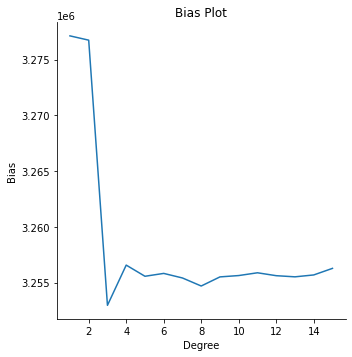

In [198]:
sns.relplot(data=details, x="Degree", y="Bias", kind="line").set(title="Bias Plot")


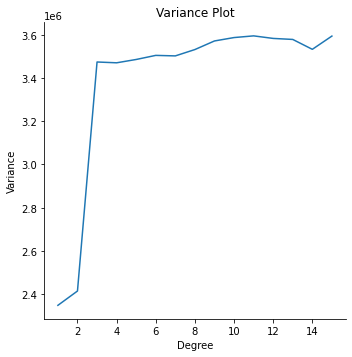

In [206]:
sns.relplot(
    data=details, x="Degree", y="Variance", kind="line"
).set(title="Variance Plot")

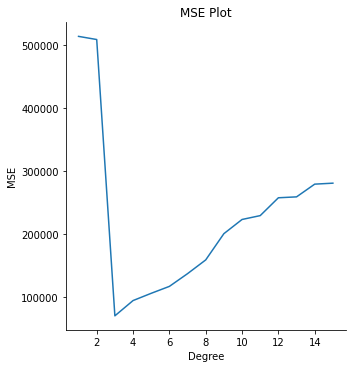

In [179]:
sns.relplot(
    data=details, x="Degree", y="MSE", kind="line", 
).set(title="MSE Plot")

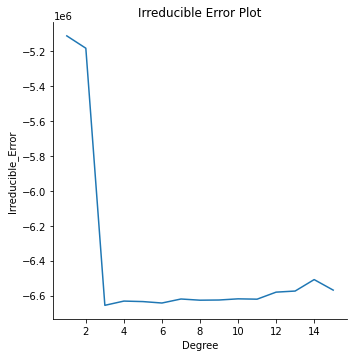

In [180]:
sns.relplot(
    data=details, x="Degree", y="Irreducible_Error", kind="line", 
).set(title="Irreducible Error Plot")

# Task 4: Plotting $Bias^2$-Variance graph

The graph is plotted accordingly to the bias, variance and MSE values of the different models.



In [208]:
data = { 'Degree' : degree,
          'Bias^2' : bias2_list,
          'Variance' : var_list,
          'MSE' : mse_list,
        }

tradeoff = pd.DataFrame(data = data)

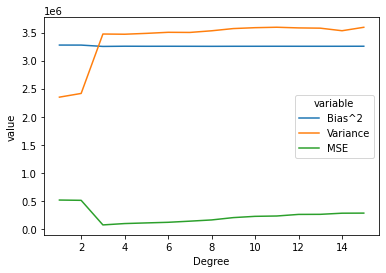

In [204]:
sns.lineplot(x='Degree', y = 'value', hue='variable', data = pd.melt(tradeoff, ['Degree']))